#KNN


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
! wget https://www.dropbox.com/s/vg4w3gs6qqoctrv/mnist_train_small.npy?dl=0
data = np.load("/content/mnist_train_small.npy?dl=0")
X = data[:,1:]
y = data[:,0]
X.shape , y.shape

--2020-12-03 17:50:07--  https://www.dropbox.com/s/vg4w3gs6qqoctrv/mnist_train_small.npy?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/vg4w3gs6qqoctrv/mnist_train_small.npy [following]
--2020-12-03 17:50:08--  https://www.dropbox.com/s/raw/vg4w3gs6qqoctrv/mnist_train_small.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3d08548989f4da34434463cacd.dl.dropboxusercontent.com/cd/0/inline/BEaFfo_0Gr_D_cR4CXNs8mIW8pyLeAaHgKGM7koNoZLVzZHKZQ7ZTCIA1pZ75NgztHYUzdD1yUvsbG-ATxG8EuDGDF2n5oSsrmKlHFUb5G4e0liTa06-kyn7__RyQpnJAz4/file# [following]
--2020-12-03 17:50:08--  https://uc3d08548989f4da34434463cacd.dl.dropboxusercontent.com/cd/0/inline/BEaFfo_0Gr_D_cR4CXNs8mIW8pyLeAaHgKGM7koNoZLVzZHKZQ7ZTCIA1pZ75NgztHYUzdD1yUvsbG-ATx

((19999, 784), (19999,))

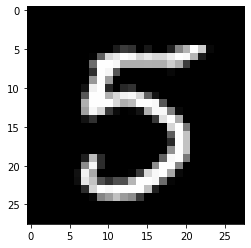

In [3]:
plt.imshow(X[0].reshape(28,28),cmap='gray')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
X_train.shape , X_test.shape

((13399, 784), (6600, 784))

# Sklearn KNN implementation


In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
model = KNeighborsClassifier()

In [8]:
# only plotting of points taking place
# no work happening in training knn model
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
model.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [10]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

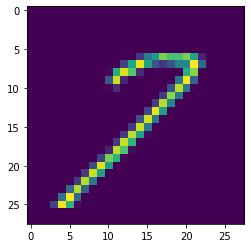

In [11]:
plt.imshow(X_test[0].reshape(28,28))

In [12]:
model.score(X_test[:1000],y_test[:1000])

0.946

# Custom KNN

In [13]:
class CustomKNN:

    def __init__(self, n_neighbours=5):
        self.n_neighbours = n_neighbours
        
    # training function
    def fit(self, X, y):
        self._X = (X - X.mean()) / X.std() # standardisation
        self._y = y
    
    # predict point
    # given a single point, find it's class  
    def predict_point(self, point):
        # storing the dis of given 'point' from each point in training data
        list_dist = []
        
        # these points are from my training data
        for x_point, y_point in zip(self._X, self._y):
            dist_point = ((point - x_point) ** 2).sum()
            list_dist.append([dist_point, y_point])
        
        # sorting the list according to the distance
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbours]
        
        # taking the count 
        items, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)
        ans = items[np.argmax(counts)]
        return ans
            
    # gives answer for each number in the array
    def predict(self, X):
        results = []
        X = (X - X.mean()) / X.std() 
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results, dtype=int)

    # score to measure accuracy
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

In [14]:
model2 = CustomKNN()

In [15]:
model2.fit(X_train, y_train)


In [16]:
model2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [17]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [19]:
model2.score(X_test[:1000], y_test[:1000])
 # more time consumption for similar accuracy

0.947